### *Pyomo Tests*

In [ ]:
%%sh
pyomo help -s

sh: 1: pyomo: not found


In [ ]:
!pip install -q pyomo
!apt-get install -y -qq glpk-utils

     |████████████████████████████████| 9.1 MB 5.3 MB/s 
     |████████████████████████████████| 49 kB 5.0 MB/s 
Selecting previously unselected package libsuitesparseconfig5:amd64.
(Reading database ... 155013 files and directories currently installed.)
Preparing to unpack .../libsuitesparseconfig5_1%3a5.1.2-2_amd64.deb ...
Unpacking libsuitesparseconfig5:amd64 (1:5.1.2-2) ...
Selecting previously unselected package libamd2:amd64.
Preparing to unpack .../libamd2_1%3a5.1.2-2_amd64.deb ...
Unpacking libamd2:amd64 (1:5.1.2-2) ...
Selecting previously unselected package libcolamd2:amd64.
Preparing to unpack .../libcolamd2_1%3a5.1.2-2_amd64.deb ...
Unpacking libcolamd2:amd64 (1:5.1.2-2) ...
Selecting previously unselected package libglpk40:amd64.
Preparing to unpack .../libglpk40_4.65-1_amd64.deb ...
Unpacking libglpk40:amd64 (4.65-1) ...
Selecting previously unselected package glpk-utils.
Preparing to unpack .../glpk-utils_4.65-1_amd64.deb ...
Unpacking glpk-utils (4.65-1) ...
Setting up 

In [ ]:
# pip show pyomo==6.1.2
# python==3.7.11
# glpk==0.4.6

In [ ]:

model = pe.ConcreteModel()

model.x1 = pe.Var(domain=pe.Binary)
model.x2 = pe.Var(domain=pe.Binary)
model.x3 = pe.Var(domain=pe.Binary)
model.x4 = pe.Var(domain=pe.Binary)
model.x5 = pe.Var(domain=pe.Binary)

obj_expr = 3*model.x1 + 4*model.x2 + 5*model.x3 + 8*model.x4 + 9*model.x5
model.obj = pe.Objective(sense=pe.maximize, expr=obj_expr)

con_expr = 2*model.x1 + 3*model.x2 + 4*model.x3 + 5*model.x4 + 9*model.x5 <= 20
model.con = pe.Constraint(expr=con_expr)
result=solver.solve(model,tee=True)

In [ ]:
print(pe.value(model.x1))
print(pe.value(model.x2))
print(pe.value(model.x3))
print(pe.value(model.x4))
print(pe.value(model.x5))
print(pe.value(model.obj))

1.0
0.0
1.0
1.0
1.0
25.0


### *Gurobi Tests*

In [ ]:
 import random
n = 10
m = 5
set_I = range(1, n+1)
set_J = range(1, m+1)
c = {(i,j): random.normalvariate(0,1) for i in set_I for j in set_J}
a = {(i,j): random.normalvariate(0,5) for i in set_I for j in set_J}
l = {(i,j): random.randint(0,10) for i in set_I for j in set_J}
u = {(i,j): random.randint(10,20) for i in set_I for j in set_J}
b = {j: random.randint(0,30) for j in set_J}

In [ ]:
import gurobipy as grb

In [ ]:
opt_model = grb.Model(name="MIP Model")
x_vars  ={(i,j):opt_model.addVar(vtype=grb.GRB.CONTINUOUS, 
                        lb=l[i,j], 
                        ub= u[i,j],
                        name="x_{0}_{1}".format(i,j)) 
for i in set_I for j in set_J}
# if x is Binary
x_vars  = {(i,j):opt_model.addVar(vtype=grb.GRB.BINARY,
                        name="x_{0}_{1}".format(i,j)) 
for i in set_I for j in set_J}
# if x is Integer
x_vars  ={(i,j):opt_model.addVar(vtype=grb.GRB.INTEGER,
                        lb=l[i,j], 
                        ub= u[i,j],
                        name="x_{0}_{1}".format(i,j)) 
for i in set_I for j in set_J}

In [ ]:
x_vars

{(1, 1): <gurobi.Var *Awaiting Model Update*>,
 (1, 2): <gurobi.Var *Awaiting Model Update*>,
 (1, 3): <gurobi.Var *Awaiting Model Update*>,
 (1, 4): <gurobi.Var *Awaiting Model Update*>,
 (1, 5): <gurobi.Var *Awaiting Model Update*>,
 (2, 1): <gurobi.Var *Awaiting Model Update*>,
 (2, 2): <gurobi.Var *Awaiting Model Update*>,
 (2, 3): <gurobi.Var *Awaiting Model Update*>,
 (2, 4): <gurobi.Var *Awaiting Model Update*>,
 (2, 5): <gurobi.Var *Awaiting Model Update*>,
 (3, 1): <gurobi.Var *Awaiting Model Update*>,
 (3, 2): <gurobi.Var *Awaiting Model Update*>,
 (3, 3): <gurobi.Var *Awaiting Model Update*>,
 (3, 4): <gurobi.Var *Awaiting Model Update*>,
 (3, 5): <gurobi.Var *Awaiting Model Update*>,
 (4, 1): <gurobi.Var *Awaiting Model Update*>,
 (4, 2): <gurobi.Var *Awaiting Model Update*>,
 (4, 3): <gurobi.Var *Awaiting Model Update*>,
 (4, 4): <gurobi.Var *Awaiting Model Update*>,
 (4, 5): <gurobi.Var *Awaiting Model Update*>,
 (5, 1): <gurobi.Var *Awaiting Model Update*>,
 (5, 2): <gur

### *Supply Tests*

In [ ]:
import pandas as pd

data = pd.read_csv("/content/drive/MyDrive/model data/pre_datav2.0.csv")

FileNotFoundError: ignored

In [ ]:
colnames =['date','demands_prod1','transfer_supply_quantity_prod1','expired_quantity_prod1','balance_prod1']

input = data[colnames]

In [ ]:
input.head()

$Balance_i = Balance_{i-1} + Supply_{i} - Demand_{i}$

In [ ]:
balance = [int(data.demands_prod1[0]) + int(data.balance_prod1[0]) - data.transfer_supply_quantity_prod1[0]]

target = 4
lot_yield = 7000
def get_supply(balance,i):
    b = input.demands_prod1[i:i+target].sum()
    pred_supply = max(0,(b - (balance - input.demands_prod1[i])))
    return (pred_supply - (pred_supply%lot_yield))

get_supply(balance[0],10)

In [ ]:
supply = []
for i in input.index:
    supply.append(get_supply(balance[i],i))
    balance.append(balance[i] + supply[i] + input.transfer_supply_quantity_prod1[i] -(input.demands_prod1[i] + input.expired_quantity_prod1[i]))
    

In [ ]:
out = input.copy(deep=True)

In [ ]:
out['supply_prod1'] = supply
out['balance_prod1'] = balance[1:]

In [ ]:
162222-8548+35326

189000

In [ ]:
out.head(10)

In [ ]:
def get_MFC(demands, balance):
    if (demands.cumsum()>balance).any():
        index = (demands.cumsum()>balance).idxmax()
        excess_prop = (balance - demands.cumsum()[index-1])/balance
        return (index+excess_prop)
    else:
        return len(demands)

mfc = []
for i in out.index:
    mfc.append(get_MFC(out.demands_prod1[i+1:].reset_index(drop=True), out.balance_prod1[i]))

In [ ]:
out['MFC'] = mfc

In [ ]:
out.MFC.describe()

In [ ]:
out

### *Supply Quantity Calculation*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

def get_prod_names():
    data = pd.read_csv('drive/MyDrive/model data/product_level_data2.csv')
    return data["product"].unique()

def get_product_level_data(prod):
    '''Input product name to get respective yield per lot'''
    data = pd.read_csv('drive/MyDrive/model data/product_level_data2.csv')
    return data[data["product"]==prod].target_mfc, int(data[data["product"]==prod].yield_per_lot)

def get_prod_balance(prod):
  '''
  '''
  balance = {'Product 1': 80000, 'Product 2': 81760, 'Product 3': 10000 , 'Product 4' : 10000 , 'Product 5' : 163765 , 'Product 6': 122316}
  return balance[prod]

def get_supply(demands,balance,i):
    '''Input last inventory balance and month index to get supply for target MFC'''
    b = data.demands[i:i+int(target)].sum()
    pred_supply = max(0,(b - (balance + data.transfer_supply_quantity[i] - (float(data.demands[i]) + data.expired_quantity[i]))))
    return (pred_supply - (pred_supply%lot_yield))

def get_MFC(demands, balance):
    '''Input future demand and current inventory balance to find MFC'''
    if (demands.cumsum()>balance).any():
        index = (demands.cumsum()>balance).idxmax()
        excess_prop = (balance - demands.cumsum()[index-1])/balance
        return (index + excess_prop)
    else:
        return len(demands)

def change_demand(data):
  data["demands"][1:-1:2] = 0
  #return data

def demand_sum(horizon,demands,span):
  demand_sum = []
  for i in range(horizon):
    demand_sum.append(sum(demands[i:i+span]))
  return demand_sum

    
#Fixed-point target
'''Build for non-integral target values'''
# target = 4
'''Method to input product name and balance'''

# prod = get_prod_names()[0]
planning_horizon = (2*12)

prod_demands = {}
horizon = 12
span = 11
# Read data
data = pd.read_csv("drive/MyDrive/model data/predata3.csv")
data.rename(columns = {'part' : 'product_name'}, inplace = True)
colnames = ['product_name','date','demands','transfer_supply_quantity','expired_quantity']
data = data[colnames]

#change_demand(data)
#print(data[:25])
#data["demands"] = data["demands"] - 1000
prod_name = data.product_name.unique()
output_df =pd.DataFrame(columns=colnames)
for prod in prod_name:
  prod_data = data[data["product_name"]==prod].reset_index(drop=True)
  prod_demands[prod] = demand_sum(horizon, prod_data['demands'], span)
  prod_data = prod_data[:planning_horizon]
  #prod_data['net_supply'] = prod_data['transfer_supply_quantity'] - prod_data['demands'] - prod_data['expired_quantity']
  target, lot_yield = get_product_level_data(prod)
  #Getting supply values for all data
  supply = []
  balance = [get_prod_balance(prod)]
  #print(prod_data.index)
  balance_wo_supply = [get_prod_balance(prod)]
  for i in prod_data.index:
      supply.append(get_supply(prod_data.demands,balance[i],i))
      balance.append(balance[i] + supply[i] + prod_data.transfer_supply_quantity[i] - (prod_data.demands[i] + prod_data.expired_quantity[i]))
      if i < len(prod_data.index) - 1:
        balance_wo_supply.append(balance_wo_supply[i] + prod_data.transfer_supply_quantity[i+1] - (prod_data.demands[i+1] + prod_data.expired_quantity[i+1]))

  #print(balance_wo_supply)
  #print(supply)
  out = prod_data.copy(deep=True)
  out['balance'] = balance[1:]
  #print(out['balance'])
  out['supply'] = supply

  #Getting MFC for all data
  """
  mfc = []
  for i in out.index:
      mfc.append(get_MFC(out.demands[i+1:].reset_index(drop=True), out.balance[i]))
  """

  out["lot_size"] = out.supply.apply(lambda x: int(x/lot_yield))
  #out['MFC'] = mfc
  print("For ",prod)
  #print(out.MFC.describe())
  output_df = output_df.append(out)

#print(prod_demands)
print(output_df[['date', 'demands', 'transfer_supply_quantity','expired_quantity', 'balance', 'supply']][:60])

For  Product 1
For  Product 2
For  Product 5
For  Product 6
        date demands  ...   balance   supply
0   1-Jul-21   13728  ...   74820.0      0.0
1   1-Aug-21   16792  ...   65701.0      0.0
2   1-Sep-21   16915  ...   62794.0   7000.0
3   1-Oct-21   15741  ...   62170.0   7000.0
4   1-Nov-21   17930  ...   60848.0   7000.0
5   1-Dec-21   17098  ...   58143.0   7000.0
6   1-Jan-22   16111  ...   54993.0   7000.0
7   1-Feb-22   13923  ...   45877.0      0.0
8   1-Mar-22   13073  ...   53195.0  14000.0
9   1-Apr-22   14133  ...   59193.0  14000.0
10  1-May-22   10737  ...   61857.0   7000.0
11  1-Jun-22   18964  ...   72492.0  21000.0
12  1-Jul-22   16670  ...   69250.0   7000.0
13  1-Aug-22   19111  ...   59145.0      0.0
14  1-Sep-22   17753  ...   56228.0   7000.0
15  1-Oct-22   15872  ...   55577.0   7000.0
16  1-Nov-22   11366  ...   50739.0      0.0
17  1-Dec-22   17369  ...   62492.0  21000.0
18  1-Jan-23   13934  ...   53492.0      0.0
19  1-Feb-23   12566  ...   53344.0   70

In [ ]:
import pandas as pd

def get_prod_names():
    data = pd.read_csv('drive/MyDrive/model data/product_level_data.csv')
    return data["product"].unique()

def get_product_level_data(prod):
    '''Input product name to get respective yield per lot'''
    data = pd.read_csv('drive/MyDrive/model data/product_level_data.csv')
    return data[data["product"]==prod].target_mfc, int(data[data["product"]==prod].yield_per_lot)

def get_prod_balance(prod):
  '''
  '''
  balance = {'Product 1': 189000, 'Product 2': 300000 }
  return balance[prod]

def get_supply(demands,balance,i):
    '''Input last inventory balance and month index to get supply for target MFC'''
    b = data.demands[i:i+int(target)].sum()
    pred_supply = max(0,(b - (balance + data.transfer_supply_quantity[i] - (data.demands[i] + data.expired_quantity[i]))))
    return (pred_supply - (pred_supply%lot_yield))

def get_MFC(demands, balance):
    '''Input future demand and current inventory balance to find MFC'''
    if (demands.cumsum()>balance).any():
        index = (demands.cumsum()>balance).idxmax()
        excess_prop = (balance - demands.cumsum()[index-1])/balance
        return (index + excess_prop)
    else:
        return len(demands)

    
#Fixed-point target
'''Build for non-integral target values'''
# target = 4
'''Method to input product name and balance'''

# prod = get_prod_names()[0]
planning_horizon = (2*12)


# Read data
data = pd.read_csv("drive/MyDrive/model data/predata3.csv")
data.rename(columns = {'part' : 'product_name'}, inplace = True)
colnames = ['product_name','date','demands','transfer_supply_quantity','expired_quantity']
data = data[colnames]
prod_name = data.product_name.unique()

output_df =pd.DataFrame(columns=colnames)
for prod in prod_name:
  prod_data = data[data["product_name"]==prod].reset_index(drop=True)
  prod_data = prod_data[:planning_horizon]
  target, lot_yield = get_product_level_data(prod)
  #Getting supply values for all data
  supply = []
  balance = [get_prod_balance(prod)]
  for i in prod_data.index:
      supply.append(get_supply(prod_data.demands,balance[i],i))
      balance.append(balance[i] + supply[i] + prod_data.transfer_supply_quantity[i] - (prod_data.demands[i] + prod_data.expired_quantity[i]))

  out = prod_data.copy(deep=True)
  out['balance'] = balance[1:]
  out['supply'] = supply

  #Getting MFC for all data
  mfc = []
  for i in out.index:
      mfc.append(get_MFC(out.demands[i+1:].reset_index(drop=True), out.balance[i]))

  out["lot_size"] = out.supply.apply(lambda x: int(x/lot_yield))
  out['MFC'] = mfc
  print("For ",prod)
  print(out.MFC.describe())
  output_df = output_df.append(out)

print(output_df)

FileNotFoundError: ignored

In [ ]:
output_df["due_date"] =  pd.to_datetime(output_df["date"]) - pd.to_datetime('1-Jul-21')
#output_df["due_date"] = output_df["due_date"].days#
output_df['due_date'] = output_df['due_date'].dt.days.astype('int16')
output_df["product_name"] = output_df["product_name"].astype('str')
output_df["product"] = output_df["product_name"].apply(lambda x: x[0]+ x[-1])
test_data = output_df[['product', 'due_date','lot_size']]
test_data = test_data.append(pd.DataFrame({'product': ['P3', 'P3', 'P4','P4'], 'lot_size':[2,2,1,3], 'due_date': [184,335,184,335]}))
test_data

,product,due_date,lot_size
0,P1,0,0.0
1,P1,31,0.0
2,P1,62,0.0
3,P1,92,0.0
4,P1,123,0.0
...,...,...,...
23,P6,700,0.0
0,P3,184,2.0
1,P3,335,2.0
2,P4,184,1.0


In [ ]:
input_data = pd.DataFrame(columns=['product','due_date'])
for row_id,row in test_data.iterrows():
  if row['lot_size'] == 0:
    continue
  for x in range(int(row["lot_size"])):
    #print(row['product'], row['due_date'])
    input_data = input_data.append({'product': row["product"], 'due_date':row['due_date'] }, ignore_index=True)
print(len(input_data))
input_data.to_csv('drive/MyDrive/model data/input_data.csv')
print(input_data)  

117
    product due_date
0        P1      215
1        P1      243
2        P1      274
3        P1      274
4        P1      304
..      ...      ...
112      P3      335
113      P4      184
114      P4      335
115      P4      335
116      P4      335

[117 rows x 2 columns]


In [ ]:
output = output_df.copy(deep=True).set_index(pd.MultiIndex.from_frame(output_df[["date","product_name"]]))
demand = output.demands

In [ ]:
demand.loc['1-Jul-21','Product 1']
# demand

35326

In [ ]:
import pyomo.environ as pe
import pyomo.opt as po

solver= po.SolverFactory('glpk')
model = pe.ConcreteModel()

# can use within for sets
model.months = pe.Set(initialize=out.date.to_list())
model.prods = pe.Set(initialize=prod_name)

def demand_init(m,i,j):
  return demand.loc[i,j]

model.sell = pe.Param(model.months,model.prods,initialize=demand_init)

def get_init_bal(m,i):
  return get_prod_balance(i)

model.init_bal = pe.Param(model.prods,initialize= get_init_bal)


# var has domain, bounds and within
model.make = pe.Var(model.months,model.prods,domain=pe.NonNegativeReals)
model.balance = pe.Var(model.months,model.prods,domain=pe.NonNegativeReals)

# obj has rule, sense and passes model
# constraint has model and rule
# balance > demand constraint
# model.edge = Constraint(rule= make[0,product] + )
# def mfc_constraint(m,i,j):
#   return (m.balance[i,j]<)
# model.mfc = Constraint(rule=mfc_constraint)
# model.cap = Constraint()
# model.Obj = Objective(rule,sense=pe.minimize)

In [ ]:
model.sell.pprint()

sell : Size=48, Index=sell_index, Domain=Any, Default=None, Mutable=False
    Key                       : Value
    ('1-Apr-22', 'Product 1') : 14261
    ('1-Apr-22', 'Product 2') : 49501
    ('1-Apr-23', 'Product 1') : 69297
    ('1-Apr-23', 'Product 2') : 39207
    ('1-Aug-21', 'Product 1') : 12656
    ('1-Aug-21', 'Product 2') : 39598
    ('1-Aug-22', 'Product 1') : 66067
    ('1-Aug-22', 'Product 2') : 33682
    ('1-Dec-21', 'Product 1') : 19596
    ('1-Dec-21', 'Product 2') : 13805
    ('1-Dec-22', 'Product 1') : 62469
    ('1-Dec-22', 'Product 2') : 29267
    ('1-Feb-22', 'Product 1') : 12279
    ('1-Feb-22', 'Product 2') : 47682
    ('1-Feb-23', 'Product 1') : 47986
    ('1-Feb-23', 'Product 2') : 28595
    ('1-Jan-22', 'Product 1') : 52124
    ('1-Jan-22', 'Product 2') : 44101
    ('1-Jan-23', 'Product 1') : 61021
    ('1-Jan-23', 'Product 2') : 43965
    ('1-Jul-21', 'Product 1') : 35326
    ('1-Jul-21', 'Product 2') : 14576
    ('1-Jul-22', 'Product 1') : 27921
    ('1-Jul-22

In [ ]:
model.make.pprint()

make : Size=48, Index=make_index
    Key                       : Lower : Value : Upper : Fixed : Stale : Domain
    ('1-Apr-22', 'Product 1') :     0 :  None :  None : False :  True : NonNegativeReals
    ('1-Apr-22', 'Product 2') :     0 :  None :  None : False :  True : NonNegativeReals
    ('1-Apr-23', 'Product 1') :     0 :  None :  None : False :  True : NonNegativeReals
    ('1-Apr-23', 'Product 2') :     0 :  None :  None : False :  True : NonNegativeReals
    ('1-Aug-21', 'Product 1') :     0 :  None :  None : False :  True : NonNegativeReals
    ('1-Aug-21', 'Product 2') :     0 :  None :  None : False :  True : NonNegativeReals
    ('1-Aug-22', 'Product 1') :     0 :  None :  None : False :  True : NonNegativeReals
    ('1-Aug-22', 'Product 2') :     0 :  None :  None : False :  True : NonNegativeReals
    ('1-Dec-21', 'Product 1') :     0 :  None :  None : False :  True : NonNegativeReals
    ('1-Dec-21', 'Product 2') :     0 :  None :  None : False :  True : NonNegativeReal

In [ ]:
def get_prod_balance(prod):
  '''
  '''
  balance = {'Product 1': 18900, 'Product 2': 30000 }
  return balance[prod]

get_prod_balance('Product 1')

18900

In [ ]:
# data = pd.read_csv("drive/MyDrive/model data/pre_data.csv")
# colnames = ['product_name','date','demands','transfer_supply_quantity','expired_quantity']

# prod_name = data.product_name.unique()
print(prod_name)

['Product 1' 'Product 2']


In [ ]:
output_df

,product_name,date,demands,transfer_supply_quantity,expired_quantity


### *Charts*

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

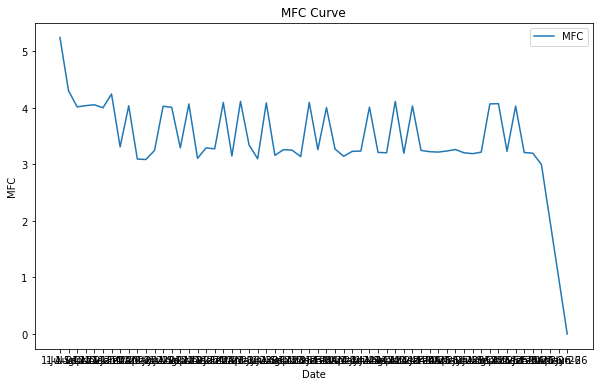

In [ ]:
p_data = out[['date','MFC']].set_index('date')

plt.figure(figsize=(10,6))
plt.title("MFC Curve")
plt.xlabel("Date")
plt.ylabel("MFC")
sns.lineplot(data=p_data)

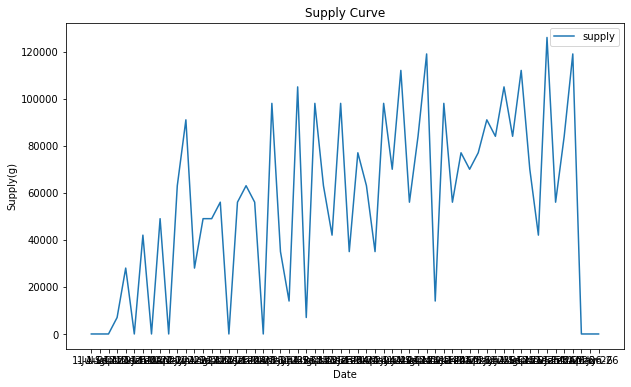

In [ ]:
s_data = out[['date','supply']].set_index('date')

plt.figure(figsize=(10,6))
plt.title("Supply Curve")
plt.xlabel("Date")
plt.ylabel("Supply(g)")
sns.lineplot(data=s_data)

### *Model Formulation Tests*

In [ ]:
import pyomo.environ as pe
import pyomo.opt as po

solver = po.SolverFactory('glpk')
model = pe.AbstractModel()

In [ ]:
from datetime import datetime

supply_lot_col = ['product_name','date','lot_size']
lot_df = out[supply_lot_col]
t_start = datetime.strptime(out.date[0],"%d-%b-%y")
lot_df.head()

,product_name,date,lot_size
0,Product 2,1-Jul-21,0
1,Product 2,1-Aug-21,0
2,Product 2,1-Sep-21,0
3,Product 2,1-Oct-21,0
4,Product 2,1-Nov-21,0


In [ ]:
lot_df.date.apply(lambda x: datetime.strptime(x,"%d-%b-%y") - t_start)

0      0 days
1     31 days
2     62 days
3     92 days
4    123 days
5    153 days
6    184 days
7    215 days
8    243 days
9    274 days
10   304 days
11   335 days
12   365 days
13   396 days
14   427 days
15   457 days
16   488 days
17   518 days
18   549 days
19   580 days
20   608 days
21   639 days
22   669 days
23   700 days
Name: date, dtype: timedelta64[ns]

In [ ]:
lot_df2 = lot_df[lot_df.lot_size>0]
print(lot_df2.size)
print(lot_df2.lot_size.value_counts())
print(lot_df2.lot_size.sum())

42
8     3
7     3
9     2
4     2
13    1
6     1
5     1
1     1
Name: lot_size, dtype: int64
96


In [ ]:
lot_df2

,product_name,date,lot_size
3,Product 1,1-Oct-21,1
4,Product 1,1-Nov-21,4
6,Product 1,1-Jan-22,6
8,Product 1,1-Mar-22,7
10,Product 1,1-May-22,9
11,Product 1,1-Jun-22,13
12,Product 1,1-Jul-22,4
13,Product 1,1-Aug-22,7
14,Product 1,1-Sep-22,7
15,Product 1,1-Oct-22,8


In [ ]:
n = lot_df2.lot_size.sum()

In [ ]:
# model.m = pyo.Param(within=pyo.NonNegativeIntegers)
model.n = pe.Param(within=pe.NonNegativeIntegers)

# model.I = pe.RangeSet(1, model.m)
model.I = pe.RangeSet(1, model.n)


In [ ]:
# Reference Code

# model.a = pyo.Param(model.I, model.J)
# model.b = pyo.Param(model.I)
# model.c = pyo.Param(model.J)

# # the next line declares a variable indexed by the set J
# model.x = pyo.Var(model.J, domain=pyo.NonNegativeReals)

# def obj_expression(m):
#     return pyo.summation(m.c, m.x)

# model.OBJ = pyo.Objective(rule=obj_expression)

# def ax_constraint_rule(m, i):
#     # return the expression for the constraint for i
#     return sum(m.a[i,j] * m.x[j] for j in m.J) >= m.b[i]

# # the next line creates one constraint for each member of the set model.I
# model.AxbConstraint = pyo.Constraint(model.I, rule=ax_constraint_rule)

In [ ]:
prd = pd.read_csv('drive/MyDrive/model data/product_level_data.csv')
prd = prd.loc[:,:'changeover'].set_index('product')

In [ ]:
prd.head()

,product_category,stage_1,stage_2,stage_3,stage_4,stage_5,stage_6,run_rate,changeover
product,,,,,,,,,
Product 1,Commercial,8,9,7,18.0,1.0,5.0,3.0,7
Product 2,Commercial,9,12,9,13.5,2.5,5.0,3.5,7
Product 3,Non-Commercial,9,7,9,12.5,2.5,6.5,5.0,6
Product 4,Non-Commercial,12,6,9,13.5,2.5,5.0,4.5,6


In [ ]:
print("RUN-TIME")
for prod in prd.index:
  print(prod + ": ", prd.loc[prod,'stage_1':'stage_6'].sum())
print("\n\nRUN RATE")
for prod in prd.index:
  print(prod + ": ", prd.loc[prod,'run_rate'])
print("\n\nCHANGEOVER")
for prod in prd.index:
  print(prod + ": ", prd.loc[prod,'changeover'])
print("\n\nCATEGORY")
for prod in prd.index:
  print(prod + ": ", prd.loc[prod,'product_category'])
prd_names = prd.index.values
print("\n\nPRODUCT NAMES")
print(prd_names,end="\n\n")
prd.loc[:,['run_rate','changeover']]

trans_t = pd.DataFrame(index=prd_names,columns=prd_names)
print("TRANSITION TIMES")
for i in prd_names:
  for j in prd_names:
    if i==j:
      trans_t.loc[i,j] = prd.loc[j,'run_rate']
    else:
      trans_t.loc[i,j] = prd.loc[j,'changeover']  
print(trans_t,end="\n\n")

RUN-TIME
Product 1:  48.0
Product 2:  51.0
Product 3:  46.5
Product 4:  48.0


RUN RATE
Product 1:  3.0
Product 2:  3.5
Product 3:  5.0
Product 4:  4.5


CHANGEOVER
Product 1:  7
Product 2:  7
Product 3:  6
Product 4:  6


CATEGORY
Product 1:  Commercial
Product 2:  Commercial
Product 3:  Non-Commercial
Product 4:  Non-Commercial


PRODUCT NAMES
['Product 1' 'Product 2' 'Product 3' 'Product 4']

TRANSITION TIMES
          Product 1 Product 2 Product 3 Product 4
Product 1         3         7         6         6
Product 2         7       3.5         6         6
Product 3         7         7         5         6
Product 4         7         7         6       4.5



In [ ]:
#Get transition time
trans_t.loc['Product 1','Product 1']

3.0

$$ Capacity\ Utilization = \frac{Production\ Time}{Available\ Time} $$

$$Production\ Time = X_n + T_R(X_n) - X_1 - T_U(X_1, X_2, X_3,...,X_n)$$

$X_i$ : start day  for process$_i$

$T_R$ : Run length function

$T_U$: Unused production interval


$$ X_i - X_{i-1} \geq T_{tr}(X_i,X_{i-1})  $$

$T_{tr} :$ transition length between two processes


In [ ]:
# MFC Constraint
non_comm = pd.read_csv('drive/MyDrive/model data/non_comm_data.csv')
cpg = pd.read_csv('drive/MyDrive/model data/cpg_data.csv')

In [ ]:
cpg

,product_name,product_category,machine_hour_per_lot,adj_to_site_COGM,total_COGM_assumptions,raw_material_per_lot,adj_to_RM,product_change_over_loss_per_lot,total_corporate_allocation,operating_loss_per_lot,wavg_termination_cost_per_lot,success_rate,year,adj_to_NS,yield_per_lot
0,Product 1,Commercial,4800,0,150000000,870000,0,160000,32000000,12500,650333,0.97,2021,400000,7.0
1,Product 2,Commercial,5100,0,150000000,900000,0,160000,32000000,12500,650333,0.95,2021,0,15.0
2,Product 3,Non-Commercial,4200,2000000,150000000,900000,0,0,32000000,12500,0,0.75,2021,0,12.6
3,Product 4,Non-Commercial,4300,2000000,150000000,1000000,1000000,0,32000000,12500,0,0.75,2021,0,1.2


In [ ]:
# Product machine hours

cpg.set_index('product_name').machine_hour_per_lot

product_name
Product 1    4800
Product 2    5100
Product 3    4200
Product 4    4300
Name: machine_hour_per_lot, dtype: int64

In [ ]:
# Product success rate
cpg.set_index('product_name').success_rate

product_name
Product 1    0.97
Product 2    0.95
Product 3    0.75
Product 4    0.75
Name: success_rate, dtype: float64

In [ ]:
# Product lead time
# prd.iloc[:,1:7].sum(axis=1)
model.lead_time = pe.Param(pp,prd.iloc[:,1:7].sum(axis=1))

RuntimeError: ignored

In [ ]:
prd.iloc[:,1:7].sum(axis=1)

product
Product 1    48.0
Product 2    51.0
Product 3    46.5
Product 4    48.0
dtype: float64

In [ ]:
pp = ['Product 1','Product 2','Product 3','Product 4']